In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import seaborn as sns

In [6]:
model = tf.keras.models.load_model('combine_prediction_model.keras')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                704       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [7]:
sampled_df = pd.read_csv('sampled_data.csv')
print(sampled_df.head())

  POS  Height (in)  Weight (lbs)  40 Yard  Bench Press  Vert Leap (in)  \
0  OT        78.00           321     5.41           20            29.0   
1  LB        73.00           235     4.70           24            33.5   
2  CB        71.00           193     4.56            9            32.0   
3  OT        78.50           290     5.20           22            25.0   
4  RB        71.13           208     4.39           15            37.0   

   Broad Jump (in)  Shuttle  3Cone  Pro Bowl  
0              102     4.90   8.23         0  
1              114     4.33   7.31         0  
2              114     4.29   7.31         0  
3               99     4.83   7.31         0  
4              121     4.39   7.18         0  


In [8]:
categorical_col = ['POS']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(sampled_df[categorical_col]).toarray()

In [9]:
numerical_col = ["Height (in)", "Weight (lbs)", "40 Yard", "Bench Press", "Vert Leap (in)", "Broad Jump (in)", "Shuttle", "3Cone"]
scalar = StandardScaler()
scaled_numerical_features = scalar.fit_transform(sampled_df[numerical_col])

In [10]:
preprocessed_data = pd.concat([pd.DataFrame(encoded_features), pd.DataFrame(scaled_numerical_features)], axis=1)
print(preprocessed_data.head())

    0    1    2    3    4    5    6    7    8    9   ...   11   12        0   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.591349   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.308385   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -1.068278   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.781322   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0 -1.018885   

         1         2         3         4         5         6         7   
0  1.819189  2.224251 -0.011422 -0.923142 -1.440135  2.249137  3.096159  
1 -0.120103 -0.296427  0.694994  0.207186 -0.035001 -0.286927  0.087014  
2 -1.067199 -0.793462 -1.954064 -0.169590 -0.035001 -0.464897  0.087014  
3  1.120142  1.478698  0.341786 -1.927878 -1.791419  1.937690  0.087014  
4 -0.728950 -1.397004 -0.894441  1.086330  0.784661 -0.019973 -0.338191  

[5 rows x 21 columns]


In [11]:
labels = sampled_df["Pro Bowl"]
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data, labels, test_size=0.1, random_state=42)

In [12]:
#print(X_test)
#print(y_test)
#print(labels)

In [13]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
pred_results = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, pred_results.round())

# Calculate precision
precision = precision_score(y_test, pred_results.round())

# Calculate recall
recall = recall_score(y_test, pred_results.round())

# Calculate F1-score
f1 = f1_score(y_test, pred_results.round())

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_results)

#Calculate Confusion Matrix
confusion_matrix = confusion_matrix(y_test, pred_results.round())
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.6956521739130435
Precision: 0.6804123711340206
Recall: 0.7252747252747253
F1-score: 0.7021276595744682
ROC AUC: 0.663948954271535


c:\Users\siyun\anaconda3\envs\tf_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\siyun\anaconda3\envs\tf_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\siyun\anaconda3\envs\tf_env\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\siyun\anaconda3\envs\tf_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

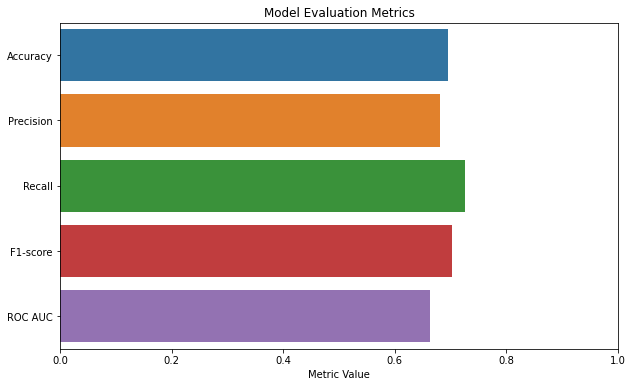

In [16]:
metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]
metric_values = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 6))
sns.barplot(x=metric_values, y=metric_names)
plt.xlabel("Metric Value")
plt.title("Model Evaluation Metrics")
plt.xlim(0, 1)
plt.show()

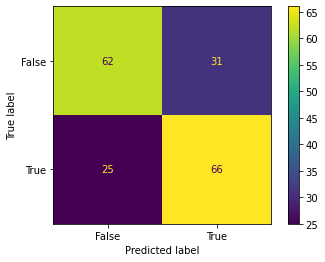

In [17]:
confusion_matrix_display.plot()
plt.show()